<a href="https://colab.research.google.com/github/Abhilash42069/Genetic-Disorder-Prediction/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [ ]:
df = pd.read_csv("Gene_Dataset.csv")

In [ ]:
df.head()

,Patient Id,Patient Age,Genes in mother side\t,Inherited from father\t,PGT,PSGT,CT,PD,PS,GeneDisorder
0,2000,6,0,1,0,1,1,1,1,NaN
1,133,39,0,0,0,1,1,1,1,NaN
2,8381,8,0,0,0,0,1,0,1,0.9217
3,1508,36,0,1,0,1,0,1,0,NaN
4,4821,1,1,0,0,1,1,1,1,NaN


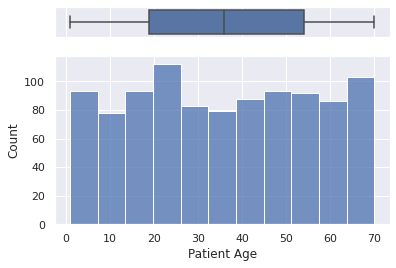

In [ ]:
cpt=df
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(cpt["Patient Age"], ax=ax_box)
sns.histplot(data=cpt, x="Patient Age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [ ]:
df.shape

(1000, 10)

In [ ]:
df.isnull().sum()

Patient Id                   0
Patient Age                  0
Genes in mother side\t       0
Inherited from father\t      0
PGT                          0
PSGT                         0
CT                           0
PD                           0
PS                           0
GeneDisorder               274
dtype: int64

In [ ]:
df.describe()

,Patient Id,Patient Age,Genes in mother side\t,Inherited from father\t,PGT,PSGT,CT,PD,PS,GeneDisorder
count,1000.000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,726.000000
mean,4948.026,35.67400,0.499000,0.498000,0.491000,0.501000,0.464000,0.516000,0.51000,0.513134
std,2859.586,20.08739,0.500249,0.500246,0.500169,0.500249,0.498952,0.499994,0.50015,0.289250
min,13.000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.001400
25%,2448.000,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.266775
50%,4930.500,36.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.508250
75%,7320.250,54.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.771825
max,9994.000,70.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.999500


In [ ]:
df.head()

,Patient Id,Patient Age,Genes in mother side\t,Inherited from father\t,PGT,PSGT,CT,PD,PS,GeneDisorder
0,2000,6,0,1,0,1,1,1,1,NaN
1,133,39,0,0,0,1,1,1,1,NaN
2,8381,8,0,0,0,0,1,0,1,0.9217
3,1508,36,0,1,0,1,0,1,0,NaN
4,4821,1,1,0,0,1,1,1,1,NaN


In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imput = KNNImputer(n_neighbors=3) 

In [ ]:
df1 = imput.fit_transform(df)

In [ ]:
df1

array([[2.00000000e+03, 6.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 3.60133333e-01],
       [1.33000000e+02, 3.90000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.52100000e-01],
       [8.38100000e+03, 8.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 9.21700000e-01],
       ...,
       [9.23900000e+03, 2.50000000e+01, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 5.69500000e-01],
       [6.64700000e+03, 3.00000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.01600000e-01],
       [5.64800000e+03, 2.00000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.29400000e-01]])

In [ ]:
df = pd.DataFrame(df1, columns=df.columns)

In [ ]:
df.isnull().sum()

Patient Id                 0
Patient Age                0
Genes in mother side\t     0
Inherited from father\t    0
PGT                        0
PSGT                       0
CT                         0
PD                         0
PS                         0
GeneDisorder               0
dtype: int64

In [ ]:
df.shape

(1000, 10)

In [ ]:
df.drop_duplicates()

,Patient Id,Patient Age,Genes in mother side\t,Inherited from father\t,PGT,PSGT,CT,PD,PS,GeneDisorder
0,2000.0,6.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.360133
1,133.0,39.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.152100
2,8381.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.921700
3,1508.0,36.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.384067
4,4821.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.597100
...,...,...,...,...,...,...,...,...,...,...
995,3196.0,25.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.346400
996,940.0,9.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.346400
997,9239.0,25.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.569500
998,6647.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.101600


In [ ]:
rdf=df.sort_values(by = "Patient Age")

In [ ]:
rdf

,Patient Id,Patient Age,Genes in mother side\t,Inherited from father\t,PGT,PSGT,CT,PD,PS,GeneDisorder
970,7089.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.2353
239,8854.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.2375
470,7331.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.7895
4,4821.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.5971
446,591.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.2919
...,...,...,...,...,...,...,...,...,...,...
326,6895.0,70.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0100
261,6320.0,70.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.4116
101,6006.0,70.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.4012
7,4094.0,70.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.9105


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


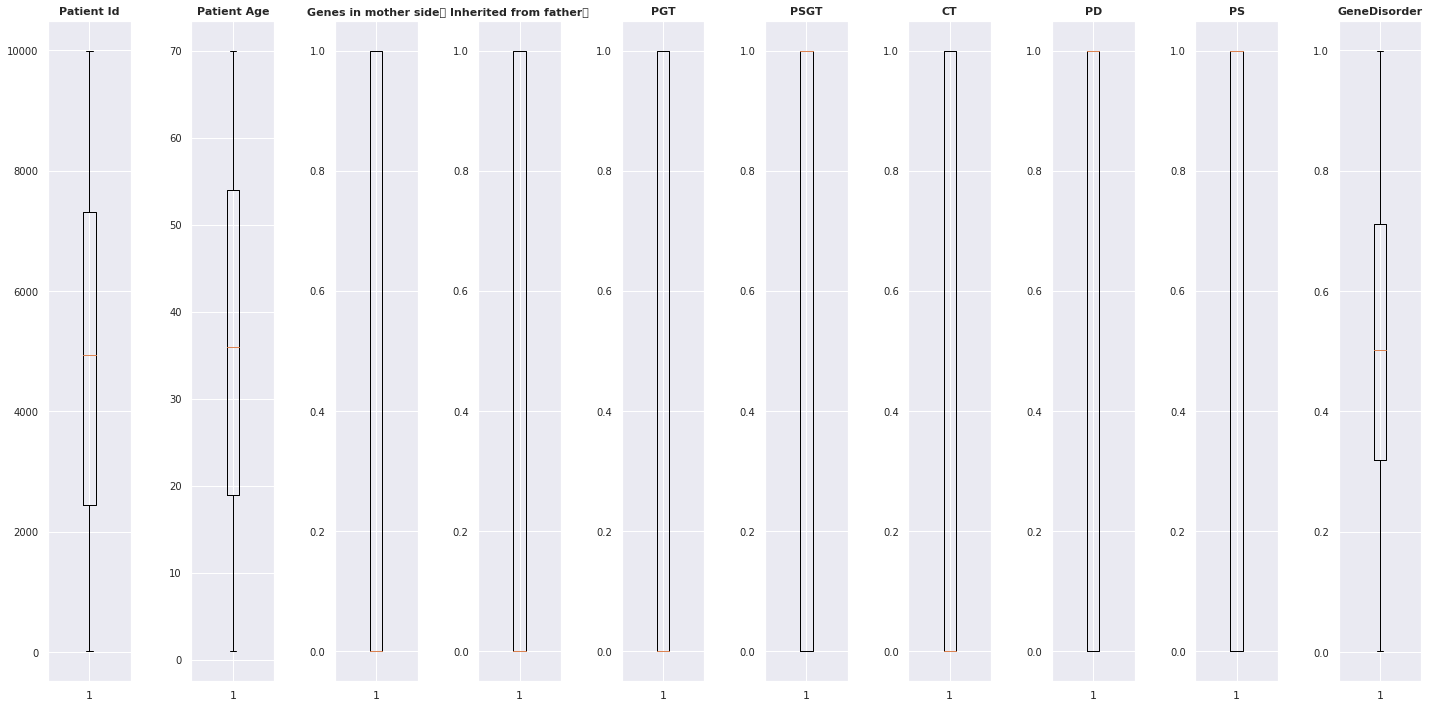

In [ ]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=11, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
    
plt.tight_layout()

In [ ]:
cpy=df.drop(['Patient Id','PGT','PSGT','CT','PD','PS', 'Genes in mother side	', 'Inherited from father	'], axis=1)

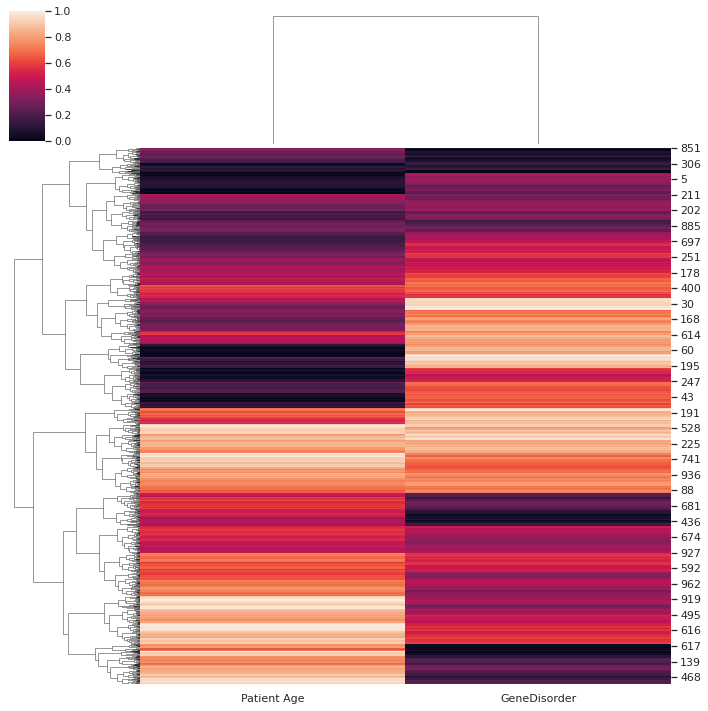

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.clustermap(cpy,standard_scale=1)